**5.21 Electric field of a charge distribution:** Suppose we have a distribution of charges
and we want to calculate the resulting electric field. One way to do this is to first calculate the electric potential $\phi$ and then take its gradient. For a point charge $q$ at the origin,
the electric potential at a distance $r$ from the origin is $\phi = q/4 \pi \epsilon_0 r$ and the electric field
is $E = - \nabla \phi$. $$ $$
a) You have two charges, of $\pm 1 C, 10$ cm apart. Calculate the resulting electric potential on a 1 m × 1 m square plane surrounding the charges and passing through
them. Calculate the potential at $1$ cm spaced points in a grid and make a visualization on the screen of the potential using a density plot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

C:\Users\John Peterson\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


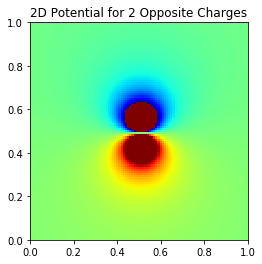

In [7]:
epsilon_naught = 8.854 * 10**(-12)
def potential(q, r): 
    '''return the potental given the charge q and distance r'''
    return q / (4 * np.pi * epsilon_naught * r)
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)
grid = np.zeros((101, 101))
pos_particle_1 = (.56, .51)
pos_particle_2 = (.46, .51)
for i in range(101):
    for j in range(101):
            r1 = ((pos_particle_1[0] - x[i])**2 + (pos_particle_1[1] - y[j])**2)**(0.5)
            r2 = ((pos_particle_2[0] - x[i])**2 + (pos_particle_2[1] - y[j])**2)**(0.5)
            maxval = 5 * 10**10
            if abs(potential(1, r1) + potential(-1, r2)) > maxval:
                grid[i][j] = maxval
            else:
                grid[i][j] = potential(1, r1) + potential(-1, r2)
plt.imshow(grid, extent = [0, 1, 0, 1])
plt.title('2D Potential for 2 Opposite Charges')
plt.jet()


b) Now calculate the partial derivatives of the potential with respect to x and y and
hence find the electric field in the xy plane. Make a visualization of the field also.

Text(0.5, 1.0, 'Electric Field')

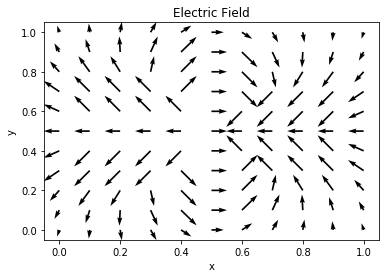

In [58]:
x = np.linspace(0, 1, 11)
y = np.linspace(0, 1, 11)
x_E_mag = np.zeros((11, 11))
y_E_mag = np.zeros((11, 11))
pos_particle_1 = (.55, .50)
pos_particle_2 = (.45, .50)
h = 48 * 10**(-8)
for i in range(0, len(x)): 
    x_i = x[i]
    for j in range(0, len(y)):
        y_j = y[j] 
        r1x_p = (((x_i + h/2) - pos_particle_1[0])**2 + (y_j - pos_particle_1[1])**2)**(0.5)
        r2x_p = (((x_i + h/2) - pos_particle_2[0])**2 + (y_j - pos_particle_2[1])**2)**(0.5)
        r1x_m = (((x_i - h/2) - pos_particle_1[0])**2 + (y_j - pos_particle_1[1])**2)**(0.5)
        r2x_m = (((x_i - h/2) - pos_particle_2[0])**2 + (y_j - pos_particle_2[1])**2)**(0.5)
        r1y_p = ((x_i - pos_particle_1[0])**2 + ((y_j + h/2) - pos_particle_1[1])**2)**(0.5)
        r2y_p = ((x_i - pos_particle_2[0])**2 + ((y_j + h/2) - pos_particle_2[1])**2)**(0.5)
        r1y_m = ((x_i - pos_particle_1[0])**2 + ((y_j - h/2) - pos_particle_1[1])**2)**(0.5)
        r2y_m = ((x_i - pos_particle_2[0])**2 + ((y_j - h/2) - pos_particle_2[1])**2)**(0.5)
        f_dx = potential(1, r1x_p) + potential(-1, r2x_p)
        sec_dx = potential(1, r1x_m) + potential(-1, r2x_m)
        dfdx = (f_dx - sec_dx)/h
        f_dy = potential(1, r1y_p) + potential(-1, r2y_p)
        sec_dy = potential(1, r1y_m) + potential(-1, r2y_m)
        dfdy = (f_dy - sec_dy)/h
        maxval = 9 * 10**9
        if dfdx != 0 and abs(dfdx) > maxval:
            x_E_mag[j,i] = dfdx / abs(dfdx) * maxval
        if dfdx != 0 and abs(dfdx) < maxval:
            x_E_mag[j,i] = dfdx
        if dfdy != 0 and abs(dfdy) > maxval:
            y_E_mag[j,i] = dfdy / abs(dfdy) * maxval
        if dfdy != 0 and abs(dfdy) < maxval:
            y_E_mag[j,i] = dfdy
        if dfdx == 0: 
            x_E_mag[j,i] = dfdx
        if dfdy == 0:
            y_E_mag[j,i] = dfdy
plt.quiver(x, y, x_E_mag, y_E_mag, width = 0.005)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Electric Field")

All the resistors have the same resistance $R$.  The power rail at the top
is at voltage $V_+=5\,$V.  What are the other four voltages, $V_1$
to $V_4$?

To answer this question we use Ohm's law and the Kirchhoff current
law, which says that the total net current flow out of (or into) any
junction in a circuit must be zero.  Thus for the junction at
voltage~$V_1$, for instance, we have

$${V_1-V_2\over R} + {V_1-V_3\over R} + {V_1-V_4\over R} + {V_1-V_+\over R}
= 0,$$
or equivalently

$$4V_1 - V_2 - V_3 - V_4 = V_+.$$


(a) Write similar equations for the other three junctions with unknown
voltages. $$ $$
(b) Write a program to solve the four resulting equations using Gaussian
  elimination and hence find the four voltages (or you can modify a program
  you already have, such as the program gausselim.py in
  Example 6.1).


In [57]:
#part (a)
A = np.array([[4, -1, -1, -1],
           [-1, 3, 0, -1],
           [-1, 0, 3, -1],
           [-1, -1, -1, 4]], float)
v = np.array([5, 0, 5, 0], float)

#part (b)
def Gaussian_elimination(A, v):
    '''Solves equations of the form Ax=v given A and v using Gaussian elimination'''
    N = len(v)
#Gaussian elimination
    for m in range(N):
        #Divide by the diagonal element
        div = A[m, m]
        A[m,:] /= div
        v[m] /= div
        #Subtract from the lower rows
        for i in range(m + 1, N):
            mult = A[i,m]
            A[i,:] -= mult * A[m,:]
            v[i] -= mult * v[m]
    #Backsubstitution
    x = np.empty(N, float)
    for m in range(N - 1, -1, -1):
        x[m] = v[m]
        for i in range(m + 1, N):
            x[m] -= A[m, i] * x[i]
    return x

ans = Gaussian_elimination(A, v)

print(f'V1 = {ans[0]:}')
print(f'V2 = {ans[1]:.3}')
print(f'V1 = {ans[2]:.3}')
print(f'V1 = {ans[3]:}')

V1 = 3.0
V2 = 1.67
V1 = 3.33
V1 = 2.0


**CP 6.2:** $$ $$
(a) Modify the program gausselim.py in Example 6.1 to incorporate partial pivoting (or you can write your own program from scratch if you prefer). Run your program and demonstrate that it gives the same answers as the original program when applied to Eq. (6.1) $$ $$
(b) Modify the program to solve the equations in (6.17) and show that it can ﬁnd the solution to these as well, even though Gaussian elimination without pivoting fails.

In [56]:
# Gaussian elimination
def Gaussian_elim_partial_pivoting(A, v):
    '''Guassian elimination with partial pivoting given matrix A and v'''
    N = len(v)
    for m in range(N):
        for i in range(m + 1, N):
            if A[m,m] < A[i,m]:
                A[[m,i],:] = A[[i,m],:]
                v[[m,i]] = v[[i,m]]
        #Divide by the diagonal element
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div
        #Subtract from the lower rows
        for i in range(m + 1, N):
            mult = A[i,m]
            A[i,:] -= mult * A[m,:]
            v[i] -= mult * v[m]
    #Backsubstitution
    x = np.empty(N, float)
    for m in range(N - 1, -1, -1):
        x[m] = v[m]
        for i in range(m + 1, N):
            x[m] -= A[m,i] * x[i]
    print(x)
#part a
A = np.array([[2, 1, 4, 1],
           [3, 4, -1, -1],
           [1, -4, 1, 5],
           [2, -2, 1, 3]], float)
v = np.array([-4, 3, 9, 7], float)
print('Answer for part a')
Gaussian_elim_partial_pivoting(A, v)
print('which matches Eq. 6.1')
#part b
B = np.array([[0, 1, 4, 1],
           [3, 4, -1, -1],
           [1, -4, 1, 5],
           [2, -2, 1, 3]], float)
w = np.array([ -4, 3, 9, 7 ], float)
print('Answer for part b')
Gaussian_elim_partial_pivoting(B, w)
print('which are the solutions to eq 6.17. Results we could not have found without partial pivoting')

Answer for part a
[ 2. -1. -2.  1.]
which matches Eq. 6.1
Answer for part b
[ 1.61904762 -0.42857143 -1.23809524  1.38095238]
which are the solutions to eq 6.17. Results we could not have found without partial pivoting


**CP 6.3: LU decomposition** $$ $$
This exercise invites you to write your own program to solve simultaneous equations using the method of LU decomposition. $$ $$
(a) Starting, if you wish, with the program for Gaussian elimination in Example 6.1 on page 218, write a Python function that calculates the LU decomposition of a matrix. The calculation is same as that for Gaussian elimination, except that at each step of the calculation you need to extract the appropriate elements of the matrix and assemble them to form the lower diagonal matrix L of Eq. (6.32). Test your function by calculating the LU decomposition of the matrix from Eq. (6.2), then multiplying the L and U you get and verifying that you recover the original matrix once more. $$ $$ 
(b) Build on your LU decomposition function to create a complete program to solve Eq. (6.2) by performing a double backsubstitution as described in this section. Solve the same equations using the function solve from the numpy package and verify that you get the same answer either way.

In [55]:
#part a 
def LU_Decomp(A, v):
    '''Performs LU decomposition given A and v. Returns L and U'''
    N = len(v) 
    L = np.zeros((N, N)) 
    L[:,0] = A[:,0] 
    #Gaussian elimination 
    for m in range(N): 
        #Divide by the diagonal element 
        div = A[m, m]
        A[m,:] /= div 
        v[m] /= div
        #Subtract from the lower rows 
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
        #Fill L 
        if m < N-1: 
            L[m+1:,m+1] = A[m+1:, m+1]
    U = A
    return (L, U)
    
    
   
    
A = np.array( [[2, 1, 4, 1], 
            [3, 4, -1, -1], 
            [1, -4, 1, 5], 
            [2, -2, 1, 3]], float)
v  = np.array([-4, 3, 9, 7], float)
ans = LU_Decomp(A, v)
print(f'This is L {ans[0]}')
print(f'This is U {ans[1]}')
print(f'LU is equal to {np.dot(ans[0], ans[1]):} which is A therefore the LU decomposition works')

#part b
def LU_Decomp_solv(A, v):
    '''Returns solution to Ax=v using LU Decomposition and double back substitution given A and v'''
    N = len(v) 
    L = np.zeros((N, N)) 
    L[:,0] = A[:,0] 
    #Gaussian elimination 
    for m in range(N): 
        #Divide by the diagonal element 
        div = A[m, m]
        A[m,:] /= div 
        v[m] /= div
        #Subtract from the lower rows 
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
        #Fill L 
        if m < N-1: 
            L[m+1:,m+1] = A[m+1:, m+1]
    U = A
    y = np.empty(N, float)
    for m in range(N-1, -1, -1): 
        y[m] = v[m]
        for i in range(m+1, N):
            y[m] -= L[m, i]*y[i]
    x = np.empty(N, float)
    for m in range(N-1, -1, -1): 
        x[m] = y[m]
        for i in range(m+1, N):
            x[m] -= U[m, i]*x[i]
    return x
sol = LU_Decomp_solv(A, v)
print(f'The solution is {sol:}')
print(f'We get the same result using Numpy {np.linalg.solve(A, v):}')

This is L [[  2.    0.    0.    0. ]
 [  3.    2.5   0.    0. ]
 [  1.   -4.5 -13.6   0. ]
 [  2.   -3.  -11.4  -1. ]]
This is U [[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [-0.  -0.  -0.   1. ]]
LU is equal to [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]] which is A therefore the LU decomposition works
The solution is [ 2. -1. -2.  1.]
We get the same result using Numpy [ 2. -1. -2.  1.]


**CP 6.4:** Write a program to solve the resistor network problem of Exercise 6.1 on page 220 using the function solve from numpy.linalg. If you also did Exercise 6.1, you should check that you get the same answer both times.

In [54]:
A = np.array([[4, -1, -1, -1],
           [-1, 3, 0, -1],
           [-1, 0, 3, -1],
           [-1, -1, -1, 4]], float)
v = np.array([5, 0, 5, 0], float)

print(f'The answer is V1 = {np.linalg.solve(A, v)[0]:.3}, V2 = {np.linalg.solve(A, v)[1]:.3}, V3 = {np.linalg.solve(A, v)[2]:.3}, V4 = {np.linalg.solve(A, v)[3]:.3} which matches the answer for 6.1')

The answer is V1 = 3.0, V2 = 1.67, V3 = 3.33, V4 = 2.0 which matches the answer for 6.1


**CP 6.7**
All the resistors have the same resistance R. The power rail at the top is at voltage $V_+ = 5$V. The problem is to ﬁnd the voltages $V_1 \dots V_N$ at the internal points in the circuit. $$ $$
(a) Using Ohm’s law and the Kirchhoff current law, which says that the total net current ﬂow out of (or into) any junction in a circuit must be zero, show that the voltages $V_1 \dots V_N$ satisfy the equations $$3 V_1 - V_2 - V_3 = V_+,$$ $$-V_1 + 4 V_2 - V_3 - V_4 = V_+,$$ $$.$$ $$.$$ $$.$$ $$- V_{i-2} - V_{i-1} + 4 V_i - V_{i+1} - V_{i+2} = 0,$$ $$.$$ $$.$$ $$.$$ $$V_{N-3} - V_{N-2} + 4 V_{N-1} - V_N = 0,$$
$$- V_{N-2} - V_{N-1} + 3 V_N = 0$$
Express these equations in vector form $Av = w$ and ﬁnd the values of the matrix $A$ and the vector $w$. $$ $$
(b) Write a program to solve for the values of the $V_i$ when there are N = 6 internal junctions with unknown voltages. (Hint: All the values of $V_i$ should lie between zero and 5V. If they don’t, something is wrong.) $$ $$ 
(c) Now repeat your calculation for the case where there are N = 10000 internal junctions. This part is not possible using standard tools like the solve function. You need to make use of the fact that the matrix A is banded and use the banded function from the ﬁle banded.py, discussed in Appendix E.

Part (a): $$ $$

$$\begin{pmatrix}
3 & -1 & -1 & 0 & \dots & \dots & \dots & \dots & 0\\
-1 & 4 & -1 & -1 & 0 & \dots & \dots & \dots & 0\\
-1 & -1 & 4 & -1 & -1 & 0 & \dots & \dots & 0\\
0 & -1 & -1 & 4 & -1 & -1 & 0 & \dots & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
0 & \dots & 0 & -1 & -1 & 4 & -1 & -1 & 0\\
0 & \dots & \dots & 0 & -1 & -1 & 4 & -1 & -1\\
0 & \dots & \dots & \dots & 0 & -1 & -1 & 4 & -1\\
0 & \dots & \dots & \dots & \dots & 0 & -1 & -1 & 3
\end{pmatrix} \begin{pmatrix} V_1\\ V_2\\ \vdots \\ \vdots \\ \vdots \\ \vdots \\ \vdots \\ V_{N-1} \\ V_N \end{pmatrix} = \begin{pmatrix} V_+ \\ V_+ \\ 0 \\ 0 \\ \vdots \\ \vdots \\ \vdots \\ 0 \\0  \end{pmatrix}$$

The solution for N = 6 is [3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ]
The values for Vi when N = 1000 are [4.98885075 4.98621877 4.98033349 4.97569085 4.97057357 4.96563758
 4.96063235 4.95565357 4.95066468 4.94567965 4.94069315 4.93570721
 4.93072106 4.92573498 4.92074888 4.91576279 4.91077669 4.9057906
 4.90080451 4.89581841 4.89083232 4.88584622 4.88086013 4.87587403
 4.87088794 4.86590184 4.86091575 4.85592966 4.85094356 4.84595747
 4.84097137 4.83598528 4.83099918 4.82601309 4.82102699 4.8160409
 4.8110548  4.80606871 4.80108262 4.79609652 4.79111043 4.78612433
 4.78113824 4.77615214 4.77116605 4.76617995 4.76119386 4.75620777
 4.75122167 4.74623558 4.74124948 4.73626339 4.73127729 4.7262912
 4.7213051  4.71631901 4.71133291 4.70634682 4.70136073 4.69637463
 4.69138854 4.68640244 4.68141635 4.67643025 4.67144416 4.66645806
 4.66147197 4.65648587 4.65149978 4.64651369 4.64152759 4.6365415
 4.6315554  4.62656931 4.62158321 4.61659712 4.61161102 4.60662493
 4.

Text(0.5, 1.0, 'Voltage vs. Internal Points')

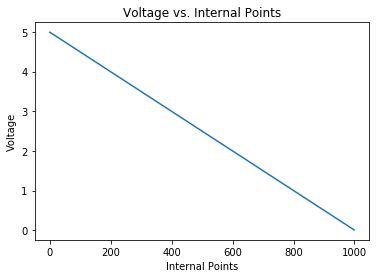

In [53]:
#part b
def banded_solv(A_input, v_input, up, down):
    '''solves Av = w given A and v banded matrices'''
    A = np.copy(A_input)
    v = np.copy(v_input)
    N = len(v)
    for i in range(N):
        div = A[up, i]
        v[i] /= div
        for j in range(1, down + 1):
            if i + j < N:
                v[i + j] -= A[up + j, i] * v[i]
        for k in range(up):
            m = i + up - k
            if m < N:
                A[k, m] /= div
                for j in range(1, down + 1):
                    A[k + j, m] -= A[up + j, i] * A[k, m]
    for n in range(N - 2, -1 , -1):
        for k in range(up):
            m = n + up - k
            if m < N:
                v[n] -= A[k, m] * v[m]
    return v
N = 6
A = np.zeros([5, N], float)
A[2, 0] = A[2, N-1] = 3
for i in range(2, N):
    A[0, i] = -1
for i in range(1, N):
    A[1, i] = -1
for i in range(1, N-1):
    A[2, i] = 4
for i in range(N-1):
    A[3, i] = -1
for i in range(N-2):
    A[4, i] = -1
v = np.zeros(N)
v[0] = 5
v[1] = 5
print(f'The solution for N = 6 is {banded_solv(A, v, 2, 2):}')

#part c
N = 1000
v = np.zeros(N)
v[0] = 5
v[1] = 5
A = np.zeros([5, N], float)
A[2, 0] = A[2, N-1] = 3
for i in range(2, N):
    A[0, i] = -1
for i in range(1, N):
    A[1, i] = -1
for i in range(1, N-1):
    A[2, i] = 4
for i in range(N-1):
    A[3, i] = -1
for i in range(N-2):
    A[4, i] = -1
from scipy.linalg import solve_banded
x = solve_banded((2,2), A, v)
print(f'The values for Vi when N = 1000 are {x}')
plt.plot(x)
plt.xlabel('Internal Points')
plt.ylabel('Voltage')
plt.title('Voltage vs. Internal Points')

**CP 6.8: THE QR ALGORITHM** $$ $$
(b) Write a Python function that takes as its argument a real square matrix A and returns the two matrices Q and R that form its QR decomposition. As a test case, try out your function on the matrix A. Check the results by multiplying Q and R together to recover the original matrix A again. $$ $$
(c) Using your function, write a complete program to calculate the eigenvalues and eigenvectors of a real symmetric matrix using the QR algorithm. Continue the calculation until the magnitude of every off-diagonal element of the matrix is smaller than $10^{−6}$. Test your program on the example matrix above. You should ﬁnd that the eigenvalues are 1, 21, −3, and −8.

In [52]:
#part b
def QR_decomp(A):
        '''Returns Q and R for a given matrix A ie the QR Decomposition'''
        N = A.shape[0]
        Q = sp.empty([ N, N ], float)
        R = sp.zeros([ N, N ], float)
        A_col = []
        for i in range(N):
            A_col.append(A[:, i])
        def length_vector(v):
            return (np.dot(v, v))**0.5
        u_col = [ np.copy(A_col[0]) ]
        q_col = [ np.copy(A_col[0]) / length_vector(A_col[0]) ]
        for i in range(1, N):
            u_col.append(np.copy(A_col[i]))
            for j in range(i):
                u_col[i] -= np.dot(q_col[j], A_col[i]) * q_col[j]
            q_col.append(u_col[i] / length_vector(u_col[i]))
        for i in range(N):
            Q[:, i] = q_col[i]
        for i in range(N):
            for j in range(i, N):
                if i == j:
                    R[i, i] = length_vector(u_col[i])
                else:
                    R[i, j] = np.dot(q_col[i], A_col[j])
        return [ Q, R ]
A = np.array([ [1, 4, 8, 4],
            [4, 2, 3, 7],
            [8, 3, 6, 9],
            [4, 7, 9, 2] ], float)
print (f'Check that Q*R gives back A. Q is {QR_decomp(A)[0]}, R is {QR_decomp(A)[1]} and Q*R is {np.dot(QR_decomp(A)[0], QR_decomp(A)[1])}')

#part c
def eigen_decomp(A, error):
    '''This function computes the eigendecomposition of A, a real symmetric matrix using QR'''
    N = A.shape[0]
    def off_diags_small_enough(a):
        def is_good_enough(x):
            if abs(x) < error:
                return True
            else:
                return False
        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                else:
                    if not is_good_enough(a[i, j]):
                        return False
        return True
    V = sp.identity(N)
    while not off_diags_small_enough(A):
        Q, R  = QR_decomp(A)
        A = np.dot(R, Q)
        V = np.dot(V, Q)
    return [ V, A ]

[eigenvectors, eigenvalues] = eigen_decomp(A, 10 ** -6)
print(f'The eigenvectors are {eigenvectors}')
print(f'The eigenvalues are the diagonal entries of {eigenvalues}')

Check that Q*R gives back A. Q is [[ 0.10153462  0.558463    0.80981107  0.1483773 ]
 [ 0.40613847 -0.10686638 -0.14147555  0.8964462 ]
 [ 0.81227693 -0.38092692  0.22995024 -0.37712564]
 [ 0.40613847  0.72910447 -0.5208777  -0.17928924]], R is [[ 9.8488578   6.49821546 10.55960012 11.37187705]
 [ 0.          5.98106979  8.4234836  -0.484346  ]
 [ 0.          0.          2.74586406  3.27671222]
 [ 0.          0.          0.          3.11592335]] and Q*R is [[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]]
The eigenvectors are [[ 0.43151698 -0.38357064 -0.77459666 -0.25819889]
 [ 0.38357063  0.43151698 -0.2581989   0.77459667]
 [ 0.62330228  0.52740965  0.25819889 -0.51639778]
 [ 0.52740965 -0.62330227  0.51639779  0.25819889]]
The eigenvalues are the diagonal entries of [[ 2.10000000e+01  7.36067996e-07  3.58098914e-14 -4.71410140e-14]
 [ 7.36067998e-07 -8.00000000e+00  5.99038895e-08 -9.78974979e-15]
 [ 1.76373367e-14  5.99038974e-08 -3.00000000e+00 -2.06493959e-08]
 [ 5.69

**CP 6.9: Asymmetric quantum well** $$ $$
Quantum mechanics can be formulated as a matrix problem and solved on a computer using linear algebra methods. Suppose, for example, we have a particle of mass M in a onedimensional quantum well of width L, but not a square well like the examples you’ve probably seen before. Suppose instead that the potential $V(x)$ varies somehow inside the well: $$ $$ 
We cannot solve such problems analytically in general, but we can solve them on the computer. In a pure state of energy E, the spatial part of the wavefunction obeys the time-independent Schrodinger equation $\hat{H}\Psi(x) = E\Psi(x)$, wehre the Hamiltonian operator $\hat{H}$ is given by $$\hat{H} = -\frac{\hslash^2}{2 M} \frac{d^2}{dx^2} + V(x)$$
For simplicity, let’s assume that the walls of the well are inﬁnitely high, so that the wavefunction is zero outside the well, which means it must go to zero at $x = 0$ and $x = L$. In that case, the wavefunction can be expressed as a Fourier sine series thus:
$$\Psi(x) = \sum_{n=1}^\infty \Psi_n sin \frac{\pi n x}{L},$$
where $\Psi_1, \Psi_2, \dots$ are the Fourier coefficients. $$ $$
(a) Noting that, for m, n positive integers $$\int_0^L sin \frac{\pi m x}{L} sin \frac{\pi n x}{L} dx = L/2 \ if \ m=n \ and \ 0 \ otw$$
Show that the Schrodinger equation $\hat{H} \Psi = E \Psi$ implies that $$\sum_{n=1}^\infty \int_0^L sin \frac{\pi m x}{L} sin \frac{\pi n x}{L} dx = \frac{1}{2} LE \Psi_m. $$
Hence, defining a matrix H with elements $$H_{mn} = \frac{2}{L} \int_0^L sin \frac{\pi m x}{L} sin \frac{\pi n x}{L} dx = \frac{2}{L} \int_0^L sin \frac{\pi m x}{L} (-\frac{\hslash^2}{2 M} \frac{d^2}{dx^2} + V(x)) sin \frac{ \pi n x}{L} dx,$$ 
Show that Schrodinger's equation can be written in matrix form as $H\Psi = E\Psi$, where $\Psi$ is the vector $(\Psi_1, \Psi_2,\dots)$ Thus \Psi is an eigenvector of the Hamiltonian matrix $H$ with eigenvalue E. If we can calculate the eigenvalues of this matrix, then we know the allowed energies of the particle in the well. $$ $$
(b) For the case $V(x) = ax/L$, evaluate the integral in $H_{mn}$ analytically and so ﬁnd a general expression for the matrix element $H_{mn}$. Show that the matrix is real and symmetric. You’ll probably ﬁnd it useful to know that $$\int_0^L sin \frac{\pi m x}{L} sin \frac{\pi n x}{L} dx = 0 \ if \ m \neq n \ and \ both \ even \ or \ both \ odd, -(\frac{2L}{\pi})^2 \frac{mn}{(m^2 - n^2)^2} \ if \ m\neq n \ and \ one \ is \ even \ and \ one \ is \ odd, \frac{L^2}{4} \ if \ m=n$$
Write a Python program to evaluate your expression for $H_{mn}$ for arbitrary m and n when the particle in the well is an electron, the well has width 5 $\overset{\circ}{A}$, and a = 10eV. (The mass and charge of an electron are $9.1094 \times 10{−31}$ kg and $1.6022 \times 10^{−19}$ C respectively.) $$ $$ 
(c) The matrix H is in theory inﬁnitely large, so we cannot calculate all its eigenvalues. But we can get a pretty accurate solution for the ﬁrst few of them by cutting off the matrix after the ﬁrst few elements. Modify the program you wrote for part (b) above to create a 10 × 10 array of the elements of H up to $m,n = 10$. Calculate the eigenvalues of this matrix using the appropriate function from numpy.linalg and hence print out, in units of electron volts, the ﬁrst ten energy levels of the quantum well, within this approximation. You should ﬁnd, for example, that the ground-state energy of the system is around 5.84eV. (Hint: Bear in mind that matrix indices in Python start at zero, while the indices in standard algebraic expressions, like those above, start at one. You will need to make allowances for this in your program.) 

Part (a) $$ $$
From $\hat{H}\Psi(x) = E\Psi(x)$ sub in value for $\Psi$ $$ $$
$\hat{H} \sum_{n=1}^\infty \Psi_n sin \frac{\pi n x}{L} = E \sum_{n=1}^\infty \Psi_n sin \frac{\pi n x}{L}$ $$ $$
Next multiply both sides by $sin \frac{\pi m x}{L}$ integrate from 0 to L $$ $$ 
$\int_0^L \hat{H} \sum_{n=1}^\infty \Psi_n sin\frac{\pi m x}{L} sin \frac{\pi n x}{L} dx = \int_0^L E \sum_{n=1}^\infty \Psi_n sin\frac{\pi m x}{L} sin \frac{\pi n x}{L} dx$
$$ $$ 
Rearrange to form $$ $$ 
$\sum_{n=1}^\infty \Psi_n \int_0^L sin\frac{\pi m x}{L}\hat{H} sin \frac{\pi n x}{L} dx = \int_0^L sin\frac{\pi m x}{L} sin \frac{\pi n x}{L}  E \sum_{n=1}^\infty \Psi_n dx$ $$ $$
All of the terms in the sum go to 0 unless $m=n$, Use the orthogonality relationship and replace $\Psi_n$ with $\Psi_m$ on the right side which gives the desired result $$ $$
$$\sum_{n=1}^\infty \Psi_n \int_0^L sin\frac{\pi m x}{L}\hat{H} sin \frac{\pi n x}{L} dx = \frac{1}{2}L E\Psi_m$$
define a matrix with elements $$ $$
$$H_{mn} = \frac{2}{L}  \int_0^L sin(\frac{\pi m x}{L})(\frac{\hslash^2}{2 M} \frac{d^2}{dx^2} + V(x)) sin(\frac{\pi n x}{L}) dx$$
$\Rightarrow$ we have the final result $H\Psi = E \Psi$

Part (b) $$ $$
For $V(x) = \frac{ax}{L}$ $$ $$
$$H_{mn} = \frac{2}{L}  \int_0^L sin(\frac{\pi m x}{L})(\frac{\hslash^2}{2 M} \frac{d^2}{dx^2} + \frac{ax}{L}) sin(\frac{\pi n x}{L}) dx$$

$$\int_0^L sin(\frac{\pi m x}{L})sin(\frac{\pi n x}{L})dx + \frac{2 a}{L^2} \int_0^L x sin(\frac{\pi m x}{L}) sin(\frac{\pi n x}{L}) dx$$

$$\int_0^L x sin(\frac{\pi m x}{L}) sin(\frac{\pi n x}{L}) dx = 0 \ if \ m \neq n, \ and \ m, \ n \ are \ both \ even \ or \ both \ odd, -2(\frac{2 L}{\pi})^2 \frac{mn}{(m^2 - n^2)^2}, \ if \ m \neq n \ and \ one \ of \ m \ or \ n \ is \ even \ and \ the \ other \ is \ odd, \ L^2 / 4 \ if \ m=n$$

In [51]:
#part b


L = 5 *10 ** -10
hbar = 1.0546 * 10 ** -34
M = 9.1094 * 10 ** -31
q = 1.6022 * 10 ** -19
a = 10 * q
N = 10
A = np.zeros((N, N))
def H(m, n):
    '''Evaluates the expression for Hmn for m and n given'''
    if n == m:
        return (((np.pi**2) * (n**2) * (hbar**2)) / (2 * M * (L**2))) + (a / 2)
    if n != m:
        if n % 2 != 0 and m % 2 == 0:
            return -(8 * m * n * a) / ((np.pi**2) * (m**2 - n**2)**2)
        if n % 2 == 0 and m % 2 != 0:
            return -(8 * m * n * a) / ((np.pi**2) * (m**2 - n**2)**2)
        else:
            return 0
#part c
for n in range(1, N + 1):
    for m in range(1, N + 1):
        A[n-1, m-1] = H(m, n)

x = np.linalg.eigvalsh(A)
#get values in terms of eV
convert = 1.60218 * 10**-19
for i in range(len(x)):
    x_converted = x[i] / convert
    print(f'n = {i+1} Eigenvalue: {x_converted} eV')




n = 1 Eigenvalue: 5.836527025497685 eV
n = 2 Eigenvalue: 11.181452524012974 eV
n = 3 Eigenvalue: 18.663621942499834 eV
n = 4 Eigenvalue: 29.145450921764976 eV
n = 5 Eigenvalue: 42.65699952373488 eV
n = 6 Eigenvalue: 59.18800282989683 eV
n = 7 Eigenvalue: 78.73307447526781 eV
n = 8 Eigenvalue: 101.29031638647973 eV
n = 9 Eigenvalue: 126.85748559143566 eV
n = 10 Eigenvalue: 155.562841946473 eV


**CP 6.16: Lagrange point** $$ $$ 
There is a magical point between the Earth and the Moon, called the $L_1$ Lagrange point, at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two. This works because the inward pull of the Earth and the outward pull of the Moon combine to create exactly the needed centripetal force that keeps the satellite in its orbit. $$ $$
(a) Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, show that the distance r from the center of the Earth to the $L_1$ point satisﬁes $$\frac{GM}{ r^2} − \frac{Gm}{(R − r)^2} = \omega^2 r,$$ where M and m are the Earth and Moon masses, G is Newton’s gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.
(b) The equation above is a ﬁfth-order polynomial equation in r (also called a quintic equation). Such equations cannot be solved exactly in closed form, but it’s straightforward to solve them numerically. Write a program that uses either Newton’s method or the secant method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four signiﬁcant ﬁgures.

Part (a) $$ $$
The Earth and moon are pulling the satelite in opposite directions and sum to equal the centripetal force that keeps the satelite in orbit $$\frac{GMm_s}{r^2} - \frac{Gmm_s}{(R-r)^2} = \frac{m_s v^2}{r}$$ 
Divide out the mass of the satelite, $m_s$ and sub $v = r \omega$ gives the desired result $$\frac{GM}{ r^2} − \frac{Gm}{(R − r)^2} = \omega^2 r$$

In [50]:
# Constants
G = 6.674 * 10 ** -11  
M = 5.974 * 10 ** 24 
m = 7.348 * 10 ** 22  
R = 3.844 * 10 ** 8  
omega = 2.662 * 10 ** -6  
guess = R * (3 / 5)

def F(r):
    return (G * M) / r**2 - (G * m) / (R - r)**2 - omega**2 * r
def secant_method(F, guess):
    '''This function implements the secant method given a function F and a guess value'''
    s0 = guess
    s1 = guess * 100
    while abs((F(s1) - F(s0))) > 0:
        s = s1 - F(s1) * (s1 - s0) / (F(s1) - F(s0))
        s0 = s1
        s1 = s
    return s
print (f'The distance to L1 is {secant_method(F, guess):.6} m')


The distance to L1 is 3.26045e+08 m
